# Pandas: maken en visualiseren van dataframes

## 1 Maken van dataframe uit csv-bestand
- Lees 'sales data-set.csv'in als het dataframe sales waarbij je de 'Date' kolom als datetime kolom instelt.

In [1]:
import pandas as pd
sales = pd.read_csv('sales data-set.csv', parse_dates = ['Date'], dayfirst = True)

## 2 Inspecteren
- Voer de basis inspecteerfuncties uit om inzicht te krijgen in het dataframe.
    - Wat is de mediane omzet?
    - Wat is het hoogste winkelnummer?
    - Welke datatypes zijn er?

In [2]:
display(sales.head())
print('\nMedian Weekly Sales:',sales['Weekly_Sales'].median())
print('Max Store number:',sales['Store'].max(),'\n')
display(sales.info())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False



Median Weekly Sales: 7612.03
Max Store number: 45 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


None

## 3 Omzet per week
- Importeer de pyplot module van matplotlib
- Voeg de kolom 'Year' en 'Week' toe aan het dataframe met daarin het jaar en het weeknummer uit de 'Date' kolom.
- Maak sales_2011 met daarin alleen de regels uit 2011.
- Maak sales_2011_by_date waarin je de omzet (Weekly_Sales) optelt per week.
- Toon een lijngrafiek met daarin de omzet per week.

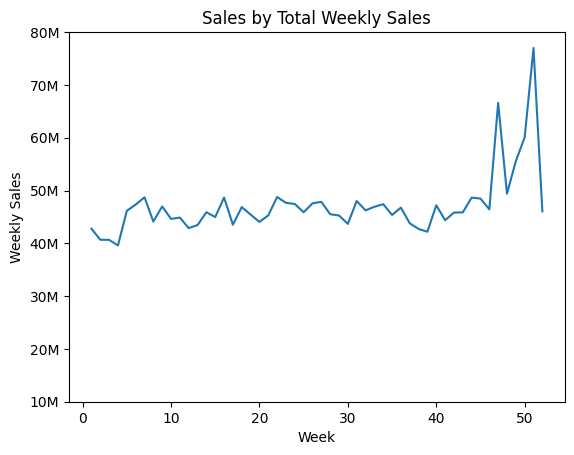

In [3]:
from matplotlib import pyplot as plt

sales['Year'] = sales['Date'].dt.year
sales['Week'] = sales['Date'].dt.isocalendar().week
sales_2011 = sales[sales['Year']==2011]
sales_2011_by_date = sales_2011.pivot_table(values='Weekly_Sales', index='Week', aggfunc='sum' )

plt.plot(sales_2011_by_date)
plt.title('Sales by Total Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.yticks([10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000],['10M','20M','30M','40M','50M','60M','70M','80M',])
plt.show()

## 4 Sales per year
- Maak het dataframe sales_by_year met daarin de totale omzet (Weekly_Sales) per jaar. 
- Toon een barchart met daarin de omzet per jaar.

,Weekly_Sales
Year,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


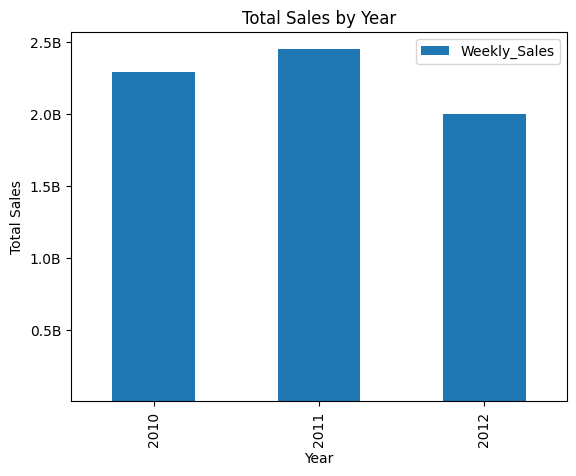

In [4]:
sales_by_year = sales.pivot_table(values='Weekly_Sales', index='Year', aggfunc='sum')
display(sales_by_year)
sales_by_year.plot(kind='bar')

# plt.plot(x = sales_by_year['Year'], height=sales_by_year['Weekly_Sales'] )
plt.yticks([500000000,1000000000,1500000000, 2000000000, 2500000000], ['0.5B','1.0B', '1.5B', '2.0B', '2.5B'])
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.title('Total Sales by Year')
plt.show()

## 5 Read feature data
- Lees 'Features data set.csv' in als het dataframe features waarbij je de 'Date' kolom als datetime kolom instelt.

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


<BarContainer object of 3 artists>

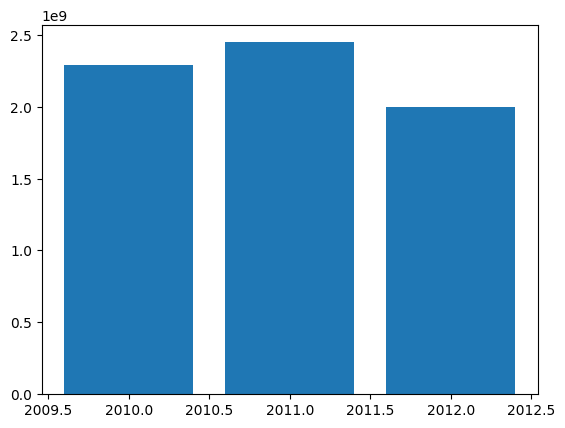

In [5]:
features = pd.read_csv('Features data set.csv', parse_dates=['Date'])


sales_by_year = sales.pivot_table(values='Weekly_Sales', index='Year', aggfunc='sum').reset_index()

display(sales_by_year)

plt.bar(x = sales_by_year['Year'], height=sales_by_year['Weekly_Sales'] )

## 6 Ontbrekende gegevens
- Maak een staafdiagram waarin het aantal missende waardes per kolom wordt getoond.

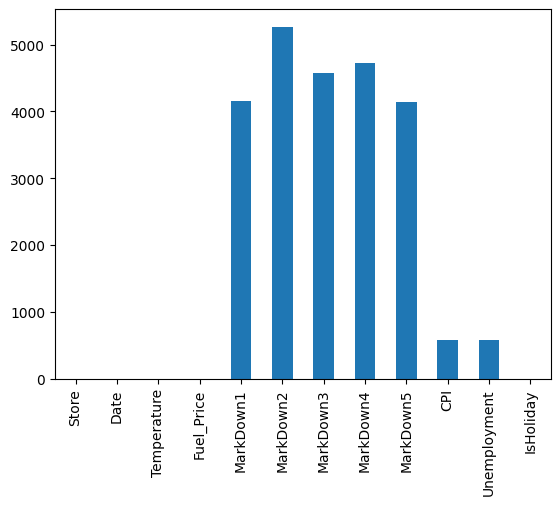

In [6]:
features_na = features.isna().sum()
features_na.plot(kind='bar')
plt.show()


## 7 Vullen van missende waardes
- Maak features_filled waarin je de missende waardes vervangt door 0.
- Maak een leeg staafdiagram waarmee je laat zien dat er geen missende waardes meer zijn.

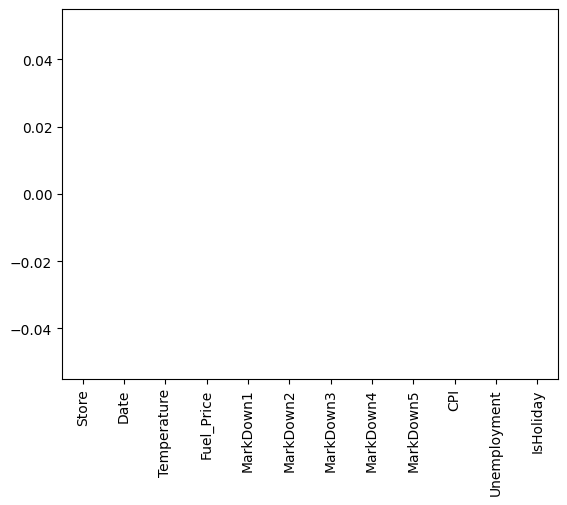

In [7]:
features_filled = features.fillna(0)
features_filled.isna().sum().plot(kind='bar')
plt.show()

## 8 Exporteren als CSV-bestand
- Maak een csv-bestand van sales_by_year.

In [8]:
sales_by_year.to_csv('sale_by_year_data_set.csv')

## 9 Histogram
- Maak een histogram van de omzet (Weekly_Sales) in sales?
- Wat maak je op uit dit histogram?

<AxesSubplot: xlabel='Week'>

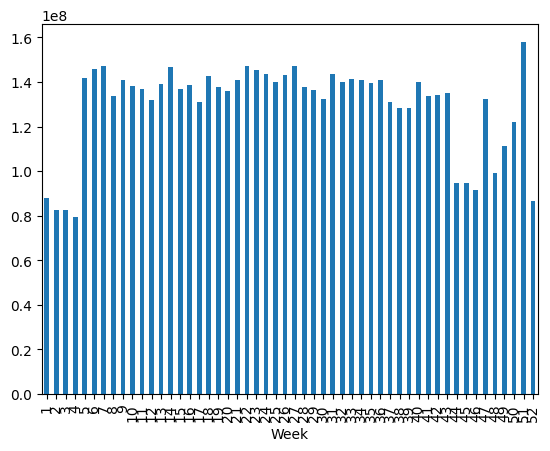

In [9]:
sales.groupby('Week')['Weekly_Sales'].sum().plot(kind='bar')
#meeste sales tussen week 5 en 43


- Bereken de mediaan en het gemiddelde van de omzet (Weekly_Sales)
- Wat verklaart het grote verschil?

In [10]:
print('median:', sales['Weekly_Sales'].median())
print('Gemidelde:', sales['Weekly_Sales'].mean())

#missende gegevens of foutief invoer

median: 7612.03
Gemidelde: 15981.25812346704


- Maak een histogram met 12 bins voor de alleen de omzetten tussen 0 en 30000.
- Welke range van omzet komt het meeste voor?
- Is dit de omzet per?  
A) week  
B) week / winkel  
C) week / winkel / afdeling  

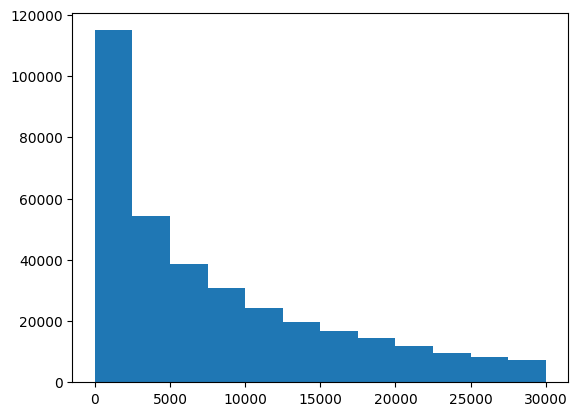

In [20]:
plt.hist(sales.loc[(sales['Weekly_Sales']>=0) & (sales['Weekly_Sales']<=30000), 'Weekly_Sales' ], bins=12)
# sales.loc[(sales['Weekly_Sales']>=0) & (sales['Weekly_Sales']<=30000)].plot(kind='bar')

plt.show()

# 0-2000
# C